In [36]:
import pandas as pd
import matplotlib.pyplot as plt      
import seaborn as sns
import re
from tqdm import tqdm
from ast import literal_eval
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import joblib

In [37]:
#reading train data
train= pd.read_csv('./Resources/train.csv')

train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [38]:
#reading test data
test= pd.read_csv('./Resources/test.csv')

test.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482242,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


Text(0.5, 1.0, 'Missing Value count By Features')

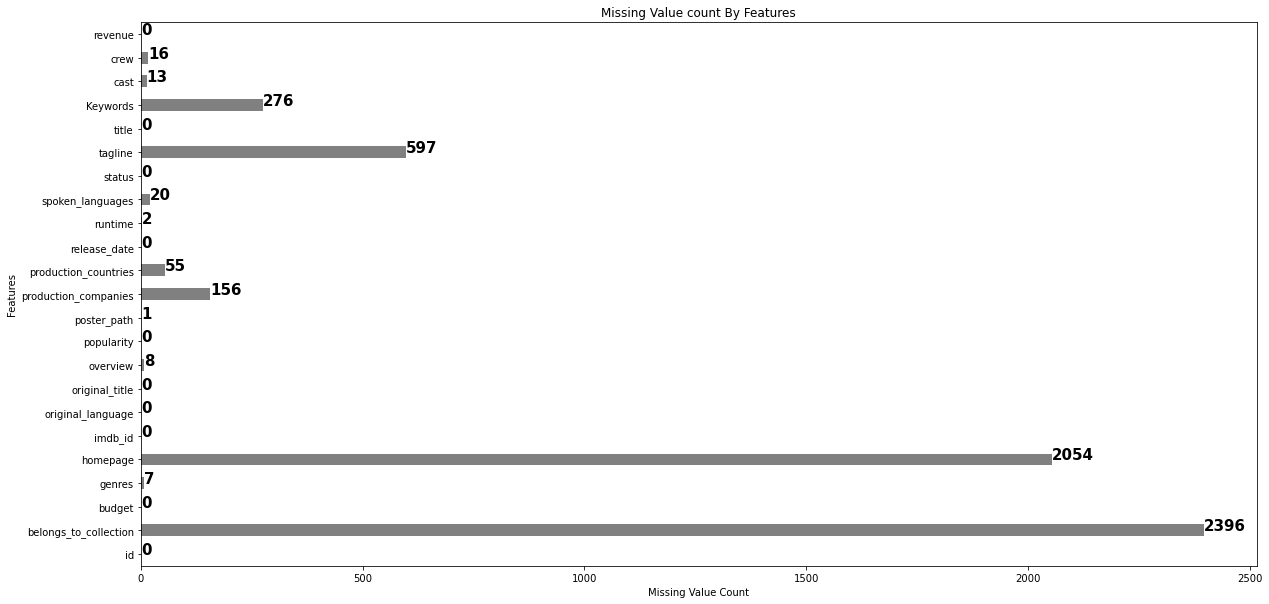

In [39]:
#Counting Missing Value By Features
train.isna().sum().plot(kind="barh", figsize=(20,10),color='grey')
for i, v in enumerate(train.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

Text(0.5, 1.0, 'Missing Value count By Features')

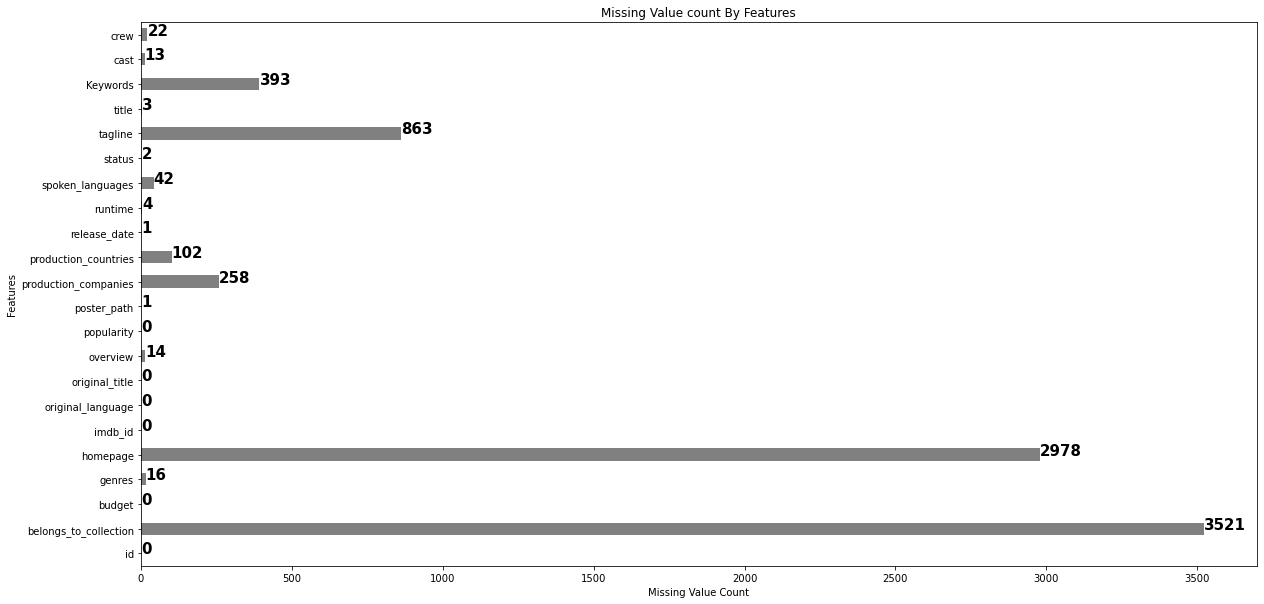

In [40]:
#Counting Missing Value By Features
test.isna().sum().plot(kind="barh", figsize=(20,10),color='grey')
for i, v in enumerate(test.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

In [41]:
# Read Train

train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Text(0, 0.5, 'revenue')

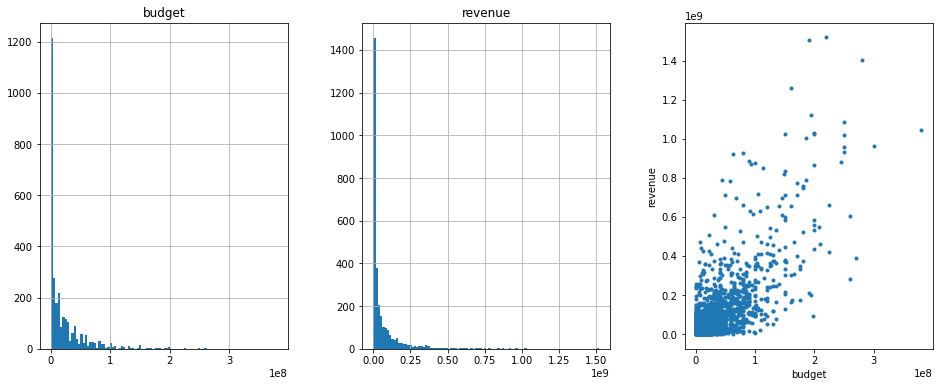

In [42]:
plt.figure(figsize=(16,6));
ax1 = plt.subplot(131)
train.hist('budget',bins=100,ax=ax1)
ax2 = plt.subplot(132)
train.hist('revenue',bins=100,ax=ax2)
ax3 = plt.subplot(133)
train.plot(x='budget',y='revenue',style='.',ax=ax3,legend=False)
plt.ylabel('revenue')

C:\Users\19542\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

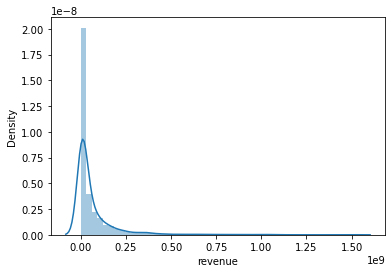

In [43]:
sns.distplot(train['revenue'])

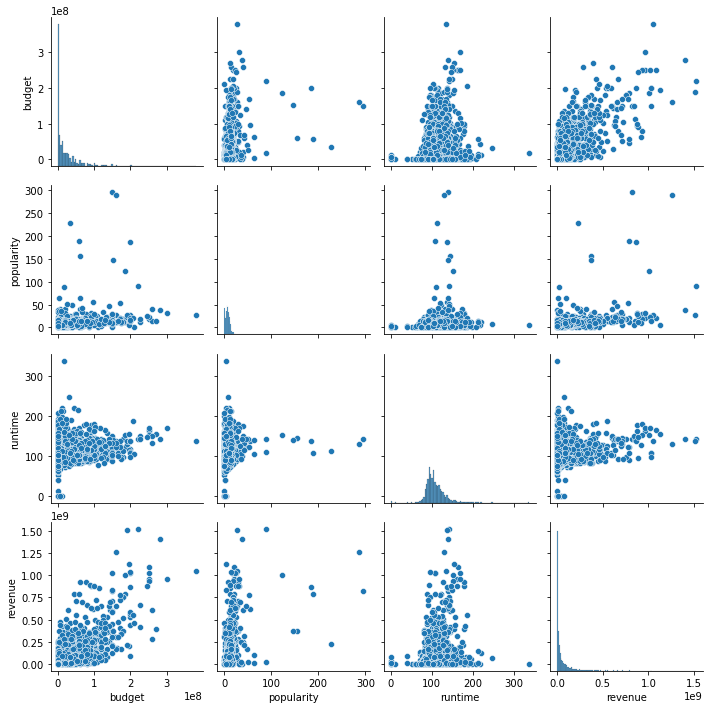

In [44]:
#pairplots
train_numer = train.select_dtypes(['number']).drop(['id'], axis=1).fillna(0)
sns.pairplot(train_numer)

In [45]:
train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [49]:
train["release_date"]=train["release_date"].astype(str)

In [50]:
train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
release_month              int16
release_year               int16
release_day                int16
dtype: object

In [60]:
#years
train.release_date.str.extract(r'([0-9]+)')


,0
0,2015
1,2004
2,2014
3,2012
4,2009
...,...
2995,1994
2996,2013
2997,1996
2998,2004


In [61]:
train.release_date.head()

0    2015-02-20
1    2004-06-08
2    2014-10-10
3    2012-09-03
4    2009-05-02
Name: release_date, dtype: object

In [71]:
train.release_date.str[0:4]
train.release_date.str[5:7]
train.release_date.str[-2:]

0       20
1       08
2       10
3       03
4       02
        ..
2995    22
2996    28
2997    10
2998    16
2999    22
Name: release_date, Length: 3000, dtype: object

In [62]:
#Year start at index 0 end before 4
train.release_date.str[0:4]

0       2015
1       2004
2       2014
3       2012
4       2009
        ... 
2995    1994
2996    2013
2997    1996
2998    2004
2999    2011
Name: release_date, Length: 3000, dtype: object

In [70]:
#Month
months=train.release_date.str[5:7]
months

0       02
1       06
2       10
3       09
4       05
        ..
2995    04
2996    03
2997    11
2998    01
2999    09
Name: release_date, Length: 3000, dtype: object

In [ ]:
#convert numeric to words (then concat all needed values to df)
month_name=[]
for month in months:
    if month== "01":month_name.append("Jan")
    if month== "02" 
        

In [65]:
#day Start at 2nd to last end at end of str
train.release_date.str[-2:]

0       20
1       08
2       10
3       03
4       02
        ..
2995    22
2996    28
2997    10
2998    16
2999    22
Name: release_date, Length: 3000, dtype: object